In [1]:
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
with open('../../Downloads/regret_case_three_person_dict.pkl','rb') as f:
    pooled = pickle.load(f) 

In [10]:
pooled[pd.Timestamp('2015-07-27 10:00:00')]

dict_keys([0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31])

In [27]:
with open('../distributions_rl4rl/time_to_active_participants_pop_32_short_staggered_12.pkl','rb') as f:
    act = pickle.load(f)

In [56]:
def get_ssw_one_time(a_dict):
    
    temp = []
    for person,sim in a_dict.items():
        if person==1:
        #print(sim.keys())
            my_average = np.array([r for r in list(sim.values())]).mean()
        
            t = [(r-my_average)**2 for r in list(sim.values())]
            temp.append(sum(t))
            print(sum(t))
            print(my_average)
    return sum(temp)
    

In [58]:
def get_ssb_one_time(a_dict):
    
    alls = []
    
    for person,sim in a_dict.items():
        t = [r for r in list(sim.values())]
        alls.extend(t)
    global_mean = np.array(alls).mean()
    temp = []
    for person,sim in a_dict.items():
        if person==1:
            print(50*(my_average-global_mean)**2)
        my_average = np.array([r for r in list(sim.values())]).mean()
        temp.append(50*(my_average-global_mean)**2)
        
    return sum(temp)
        
        

In [33]:
def get_sst_one_time(a_dict):
    
    alls = []
    
    for person,sim in a_dict.items():
        t = [r for r in list(sim.values())]
        alls.extend(t)
    global_mean = np.array(alls).mean()
    temp = []
    for person,sim in a_dict.items():
        
        my_average = [(r-global_mean)**2 for r in list(sim.values())]
        temp.append(sum(my_average))
    return sum(temp)
        

In [61]:
ssw = get_ssw_one_time(pooled[pd.Timestamp('2015-10-15 19:00:00')])

ssb =  get_ssb_one_time(pooled[pd.Timestamp('2015-10-15 19:00:00')])
sst =  get_sst_one_time(pooled[pd.Timestamp('2015-10-15 19:00:00')])

In [63]:
pooled[pd.Timestamp('2015-10-15 19:00:00')].keys()

dict_keys([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 25, 26, 27, 29])

In [39]:
def get_all(d):
    times_ssw = {}
    times_ssb = {}
    times_sst = {}
    for time in d.keys():
        times_ssw[time]=get_ssw_one_time(d[time])
        times_ssb[time]=get_ssb_one_time(d[time])
        times_sst[time]=get_sst_one_time(d[time])
    return times_ssw,times_ssb,times_sst

In [42]:
def get_weekly_averages(points):
    to_return = []
    for i in range(0,len(points),35):
        temp = points[i:i+35]
        to_return.append(np.array(temp).mean())
    return to_return

In [40]:
sswall,ssball,sstall = get_all(pooled)

In [41]:
to_plot = [sswall[t]/sstall[t] for t in sorted(sstall.keys())]

In [43]:
ts2 = get_weekly_averages(to_plot)

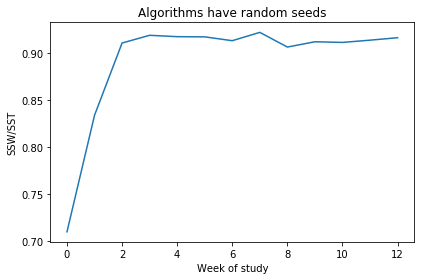

In [44]:
plt.plot(ts2)
plt.ylabel('SSW/SST')
plt.xlabel('Week of study')
plt.title('Algorithms have random seeds')
plt.tight_layout()
#plt.savefig('between study variance (SSG) over total measure of variability (SST) algorithm random seeds')
